In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

%matplotlib inline

# Preprocessing of  Data

In [2]:
train_path = '/kaggle/input/brain-tumor-classification-mri/Training'
test_path = '/kaggle/input/brain-tumor-classification-mri/Testing'

In [3]:
X_train = []
y_train = []
img_size = (300,300)

In [4]:
for folder in os.listdir(train_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: no_tumor
In folder: pituitary_tumor
In folder: meningioma_tumor
In folder: glioma_tumor


In [5]:
for folder in os.listdir(test_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: no_tumor
In folder: pituitary_tumor
In folder: meningioma_tumor
In folder: glioma_tumor


In [6]:
X_train = np.array(X_train, dtype='float32')

In [7]:
X_train = X_train / 255.0

# Visualization

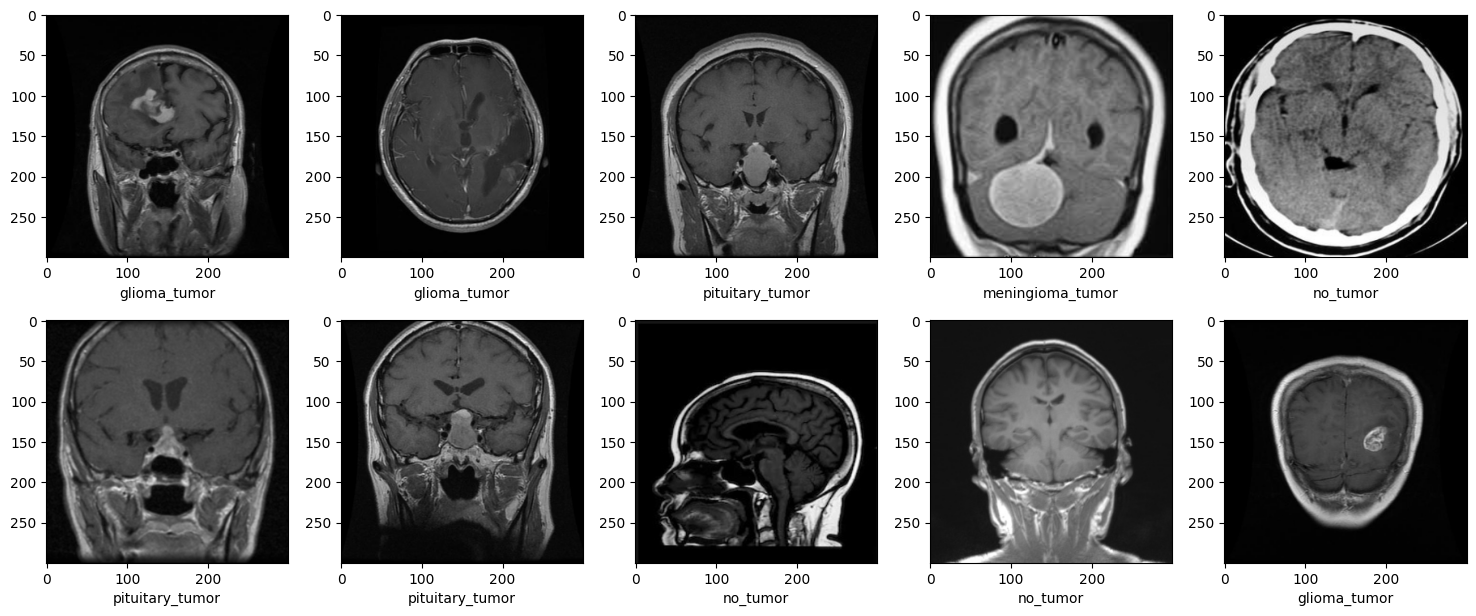

In [8]:
plt.figure(figsize=(15, 15))

random_indices = np.random.choice(len(X_train), size=10, replace=False) 
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx])
    plt.tight_layout()
plt.show()

# Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-30 22:50:36.714596: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 22:50:36.714724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 22:50:36.868941: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest')

In [11]:
datagen.fit(X_train)

# Data Preparation

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# One-Hot Encoding
y_train = np.array(pd.get_dummies(y_train))

In [14]:
#Splitting Data into training, testing and validation
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_test shape: {(X_test).shape}\n'
      f'y_test shape: {(y_test).shape}\n'
      f'X_valid shape: {(X_valid).shape}\n'
      f'y_valid shape: {(y_valid).shape}')

X_train shape: (2643, 300, 300, 3)
y_train shape: (2643, 4)
X_test shape: (327, 300, 300, 3)
y_test shape: (327, 4)
X_valid shape: (294, 300, 300, 3)
y_valid shape: (294, 4)


In [16]:
print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")

Maximum and Minimum pixel value after normalization: 1.0 - 0.0


# Building CNN Model LENET-5

In [17]:
from tensorflow.keras import Sequential, activations
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dense, Resizing, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
input_shape = X_train.shape
print(input_shape)

(2643, 300, 300, 3)


In [19]:
height, width, _ = X_train.shape[1:]
print("Width:", width)
print("Height:", height)

Width: 300
Height: 300


In [20]:
# Create LeNet-5 model
lenet_model = Sequential([
    # Resizing layer
    Resizing(32, 32, interpolation='bilinear', input_shape=(width, height, 3)),
    
    # 1st Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', input_shape=(width, height, 3)),
    BatchNormalization(),
    # 2nd Layer
    AveragePooling2D(pool_size=(2, 2)),
    
    
    # 3rd Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
      BatchNormalization(),
    # 4th Layer 
    AveragePooling2D(pool_size=(2, 2)),
  
    
    Flatten(),
    
    # 5th Layer
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
lenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,584 (240.56 KB)

 Trainable params: 61,540 (240.39 KB)

 Non-trainable params: 44 (176.00 B)

In [22]:
# Compile the model
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.5404 - loss: 1.0608 - val_accuracy: 0.3946 - val_loss: 1.3436
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7588 - loss: 0.6412 - val_accuracy: 0.3537 - val_loss: 1.3132
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8526 - loss: 0.4304 - val_accuracy: 0.3469 - val_loss: 1.3890
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8679 - loss: 0.3663 - val_accuracy: 0.3571 - val_loss: 1.5184
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9124 - loss: 0.2791 - val_accuracy: 0.4184 - val_loss: 1.3456
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9413 - loss: 0.2000 - val_accuracy: 0.4660 - val_loss: 1.2777
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9652 - loss: 0.1437 - val_accuracy: 0.5272 - val_loss: 1.2424
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9735 - loss: 0.1071 - val_accuracy: 0.6224 - v

In [24]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8460 - loss: 0.5624
Test Accuracy: 0.8501529097557068


In [25]:
from sklearn.metrics import recall_score

y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score:', recall)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Recall Score: 0.8501529051987767


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        79
           1       0.81      0.71      0.76        90
           2       0.93      0.88      0.90        73
           3       0.88      0.96      0.92        85

    accuracy                           0.85       327
   macro avg       0.85      0.85      0.85       327
weighted avg       0.85      0.85      0.85       327



In [27]:
class_names = []
for folder in os.listdir(train_path):
    class_names.append(folder)

class_names

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']

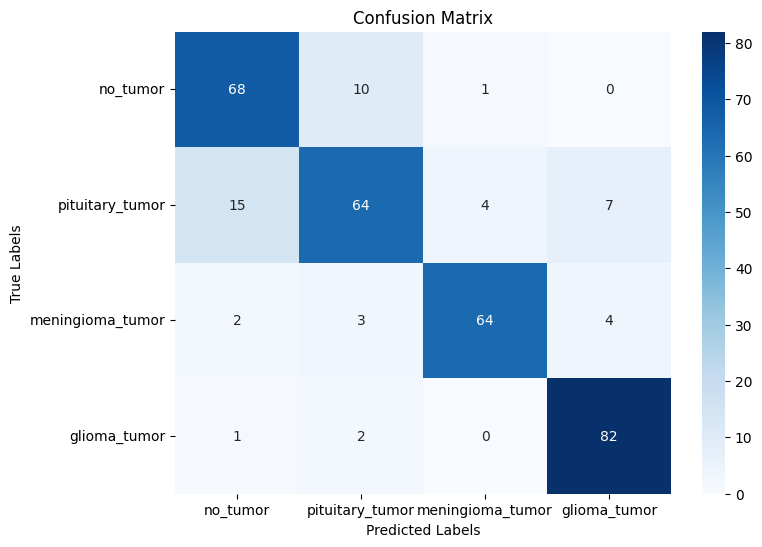

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# ALexNet

In [29]:
alexnet_model = Sequential([
            # Resizing
            Resizing(227,227, interpolation='bilinear', input_shape=(width,height,3)),
    
            #1st Convolutional Layer
            Conv2D(filters=96,kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            
            #2nd Convolutional Layer
            Conv2D(filters=256,kernel_size=(5,5), strides=(1,1), padding='same', activation='relu' ),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
             
            #3rd Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
                
            #4th Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),        
            
            #4th Convolutional Layer
            Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                     
            Flatten(),
                     
            Dense(4096, activation='relu'),
            Dropout(0.5),
            
            Dense(4096, activation='relu'),
            Dropout(0.5),
                     
            Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9959 - loss: 0.0197 - val_accuracy: 0.8878 - val_loss: 0.4134
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9987 - loss: 0.0113 - val_accuracy: 0.8810 - val_loss: 0.4258
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9977 - loss: 0.0100 - val_accuracy: 0.8707 - val_loss: 0.5310
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9940 - loss: 0.0292 - val_accuracy: 0.8946 - val_loss: 0.4410
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9977 - loss: 0.0108 - val_accuracy: 0.8776 - val_loss: 0.4542
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9957 - loss: 0.0146 - val_accuracy: 0.8946 - val_loss: 0.4483
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9989 - loss: 0.0060 - val_accuracy: 0.8810 - val_loss: 0.4851
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9811 - loss: 0.0628 - val_accuracy: 0.8061 - v

In [32]:
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9032 - loss: 0.4281
Test Accuracy: 0.9021406769752502


In [33]:
y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score:', recall)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Recall Score: 0.9021406727828746


In [34]:
print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        79
           1       0.89      0.81      0.85        90
           2       0.93      0.96      0.95        73
           3       0.93      0.99      0.96        85

    accuracy                           0.90       327
   macro avg       0.90      0.90      0.90       327
weighted avg       0.90      0.90      0.90       327



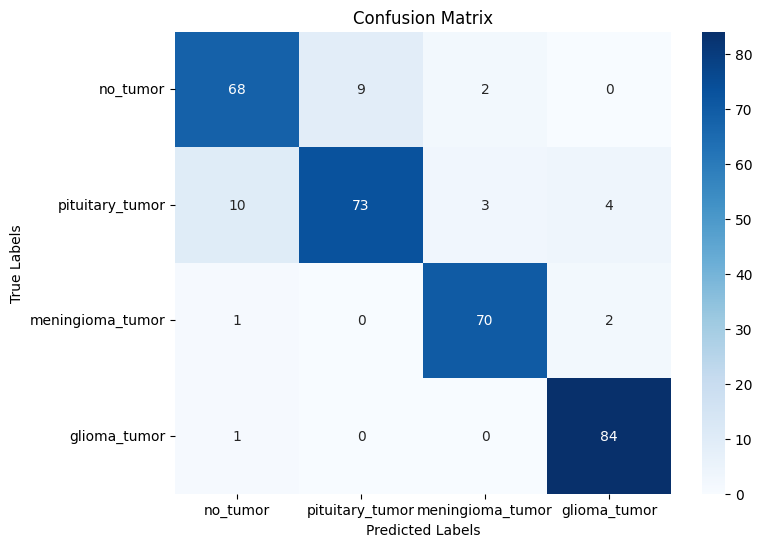

In [35]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
